In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import clean_data as cd
from plotting import plot_all_data, plot_time_frame
%matplotlib inline

## Read in data and create time features
Read in the data from the relative directory.
Assumes that there is a timestamp column and the name of this time stamp should be passed to the get_raw_data function

In [40]:
project_name = 'project_6d8c'
path = '../../capstone_data/Azimuth/{}.csv'.format(project_name)
df = cd.get_raw_data(path, 't')

## Reduce Relay signal to 0s and 1s
Relay signal is often 1 = grid and 0 = outage. there are also period inbetween which indicate there was an outage for less than the time period. We label these as outages. Convert values so that 1 = outage and 0 = grid

In [43]:
df['relay_est'] = df['relay'].apply(lambda x: 0 if x == 1.0 else 1)

In [44]:
df['relay_est'].value_counts()

0    24831
1      673
Name: relay_est, dtype: int64

## Plots for examining data
Visually examine the data for any periods which are not good.
The plot_all_data plots the given columns (scaled to 0,1) for each individual month
The plot_time_frame plots the given columns (scaled to 0,1) for the timeframe given. Use this to zoom in on periods of bad data.

In [45]:
df.index.min()

Timestamp('2016-10-13 10:30:00')

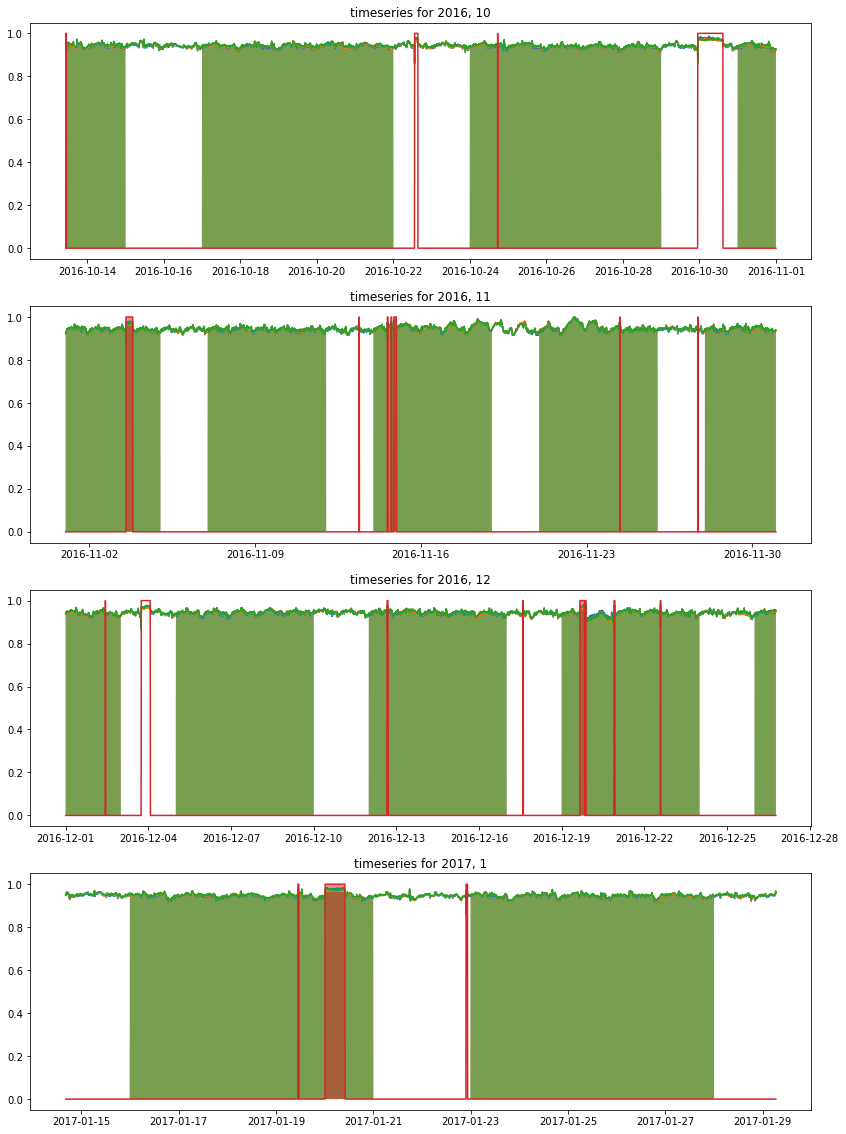

In [46]:
plot_all_data(df, columns=['load_v1rms','load_v2rms','load_v3rms','relay_est'])

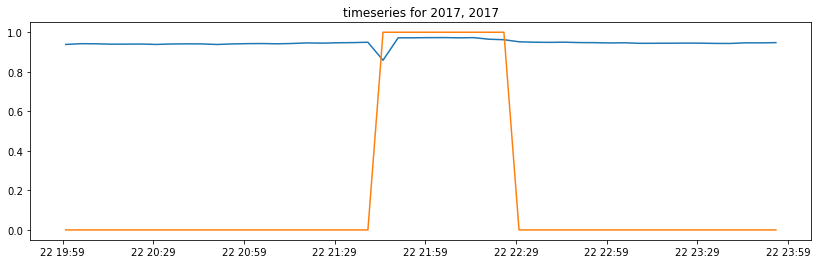

In [28]:
plot_time_frame(df,'2017-01-22 20:00:00','2017-01-23 00:00:00',columns=['load_v1rms','relay_est'])

## Label and remove bad data
Manually create tuples (start, end) of periods to remove from the data.

In [51]:
bad_data = [('2016-12-28','2017-03-01')]

In [52]:
def label_bad_data(df, dates):
    df['data_issue']=0
    for d in dates:
        df.loc[(df.index>=d[0])&(df.index<d[1]),'data_issue'] = 1
    return df

In [55]:
df = label_bad_data(df, bad_data)
df2 = df[df['data_issue']!=1]

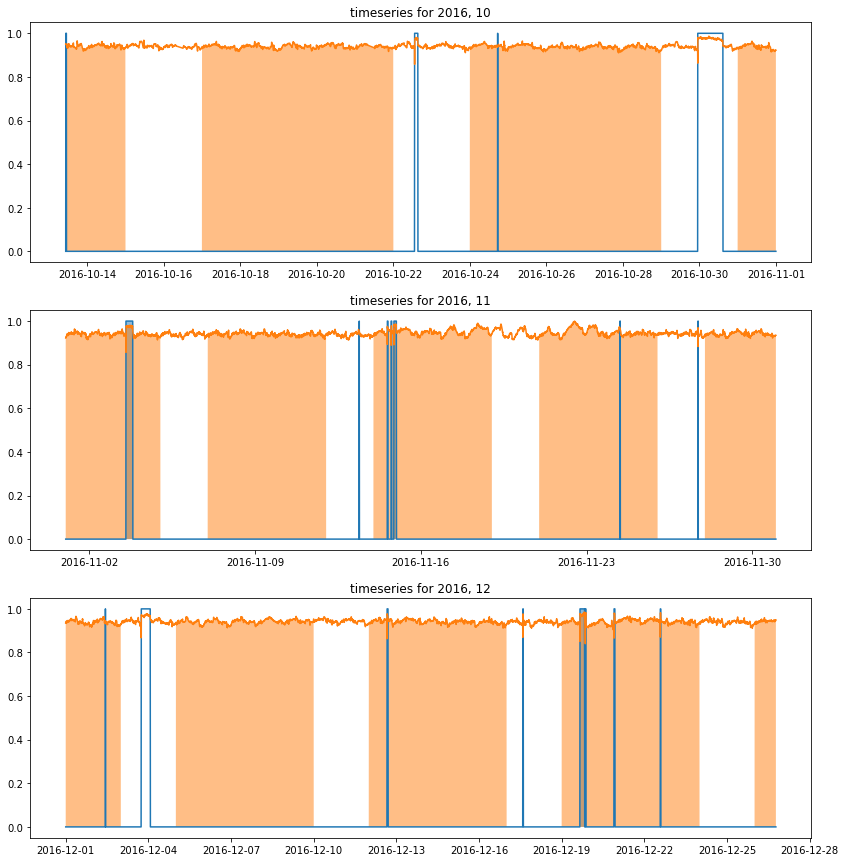

In [56]:
# Check that has worked!
plot_all_data(df2, ['relay_est','load_v1rms'])

## Investigate features of interest
If there any specific features of interest which need engineering, do this here and check that they still make sense in over the timeseries

In [57]:
df2['power_1'] = df2['load_v1rms']*df2['load_i1rms']
df2['power_2'] = df2['load_v2rms']*df2['load_i2rms']
df2['power_3'] = df2['load_v3rms']*df2['laod_i3rms']
df2['power_all'] = (df2['power_1'] +df2['power_2'] + df2['power_3'])*5/12

/home/rosina/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/rosina/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/rosina/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

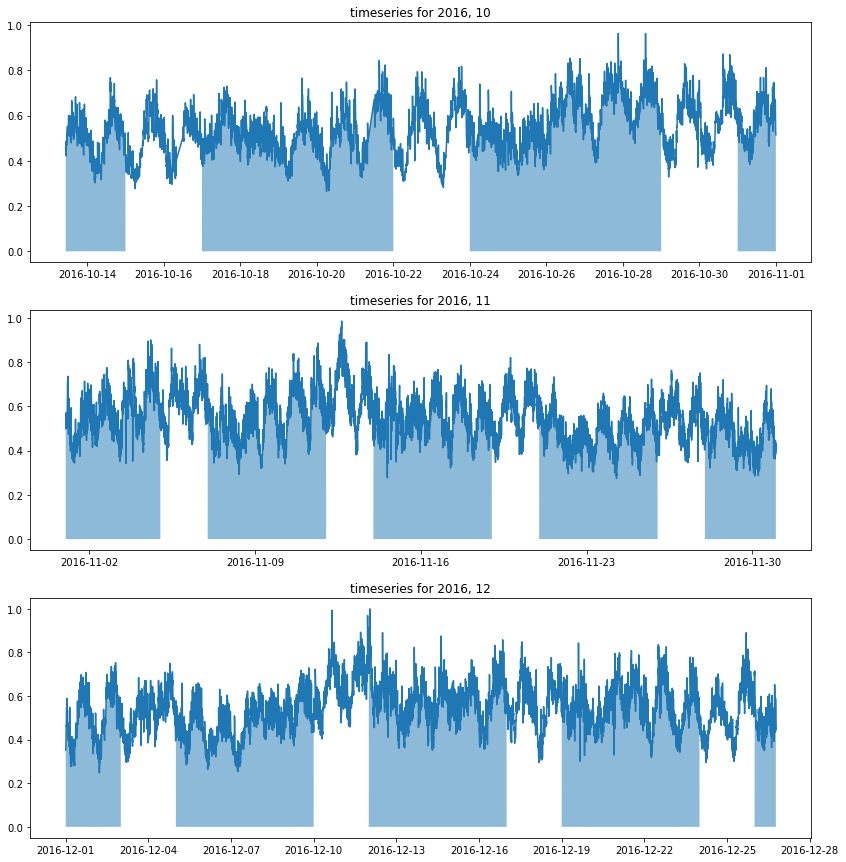

In [58]:
plot_all_data(df2, ['power_all'])

## Write data to csv
Save the clean data to the path specified. The filename will be the project_name followed by _clean


In [59]:
path = '../../capstone_data/Azimuth/clean/{}_clean.csv'.format(project_name)
df2.to_csv(path, index=True)